In [1]:
# Import libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("TAIPEI_diabetes.csv")
df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1354778.0,0.0,171.0,80.0,34.0,23.0,43.509726,1.213191,21.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1147438.0,8.0,92.0,93.0,47.0,36.0,21.240576,0.158365,23.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
29995,1742742.0,0.0,93.0,89.0,43.0,57.0,18.690683,0.427049,24.0,0.0
29996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,1099353.0,0.0,132.0,98.0,18.0,161.0,19.791645,0.302257,23.0,0.0
29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **data dictionary**

**The dataset provides attributes for 15000 women on 8 features:**

- Pregnancies: Number of times pregnant 

- PlasmaGlucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance 
test 

- DiastolicBloodPressure: Diastolic blood pressure (mm Hg) 

- TricepsThickness: Triceps skin fold thickness (mm) 

- SerumInsulin: 2-Hour serum insulin (mu U/ml) 

- BMI: Body mass index (weight in kg/(height in m)^2) 

- DiabetesPedigree: A function that scores the probability of diabetes based on family 
history 

- Age: Age in years the species 

**target varieble**

- Diabetic: 1 = diabetes diagnosed, 0 = no diabetes diagnosed

In [3]:
# View basic dataset information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  float64
 1   Pregnancies             15000 non-null  float64
 2   PlasmaGlucose           15000 non-null  float64
 3   DiastolicBloodPressure  15000 non-null  float64
 4   TricepsThickness        15000 non-null  float64
 5   SerumInsulin            15000 non-null  float64
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  float64
 9   Diabetic                15000 non-null  float64
dtypes: float64(10)
memory usage: 2.3 MB
None
   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0        NaN          NaN            NaN                     NaN   
1  1354778.0          0.0          171.0                    80.0   
2    

In [4]:
#  Check first 5 rows
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1354778.0,0.0,171.0,80.0,34.0,23.0,43.509726,1.213191,21.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1147438.0,8.0,92.0,93.0,47.0,36.0,21.240576,0.158365,23.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 3. Check missing values
print(df.isnull().sum())

PatientID                 15000
Pregnancies               15000
PlasmaGlucose             15000
DiastolicBloodPressure    15000
TricepsThickness          15000
SerumInsulin              15000
BMI                       15000
DiabetesPedigree          15000
Age                       15000
Diabetic                  15000
dtype: int64


In [6]:
# Check zero values (invalid for medical data)
zero_columns = ['PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI']
print((df[zero_columns] == 0).sum())

PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
dtype: int64


In [7]:
# Drop rows where all columns are NaN
df = df.dropna(how='all')

In [8]:
# Check statistical summary
print(df.describe())

          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000

In [9]:
# 6. Check class distribution (target variable)
print(df['Diabetic'].value_counts())

Diabetic
0.0    10000
1.0     5000
Name: count, dtype: int64


**1. Univariate Analysis (The "Single Feature" Check)**

Goal: Understand the "personality" of each variable on its own.

Spotting "Impossible" Data: In a diabetes dataset, you might find a BloodPressure or BMI of 0. Univariate analysis (like a histogram) flags these so you can replace them with the median or mean before training.

Checking for Skewness: Most machine learning models (like Linear Regression) work best when data is distributed like a "bell curve." If your Insulin data is heavily skewed (all bunched at one end), you’ll know you need to apply a log transformation to help the model learn better.

Identifying Outliers: A boxplot will show you if a patient has a Glucose level of 500. Is that a real medical emergency or a typo? You need to decide how to handle it.

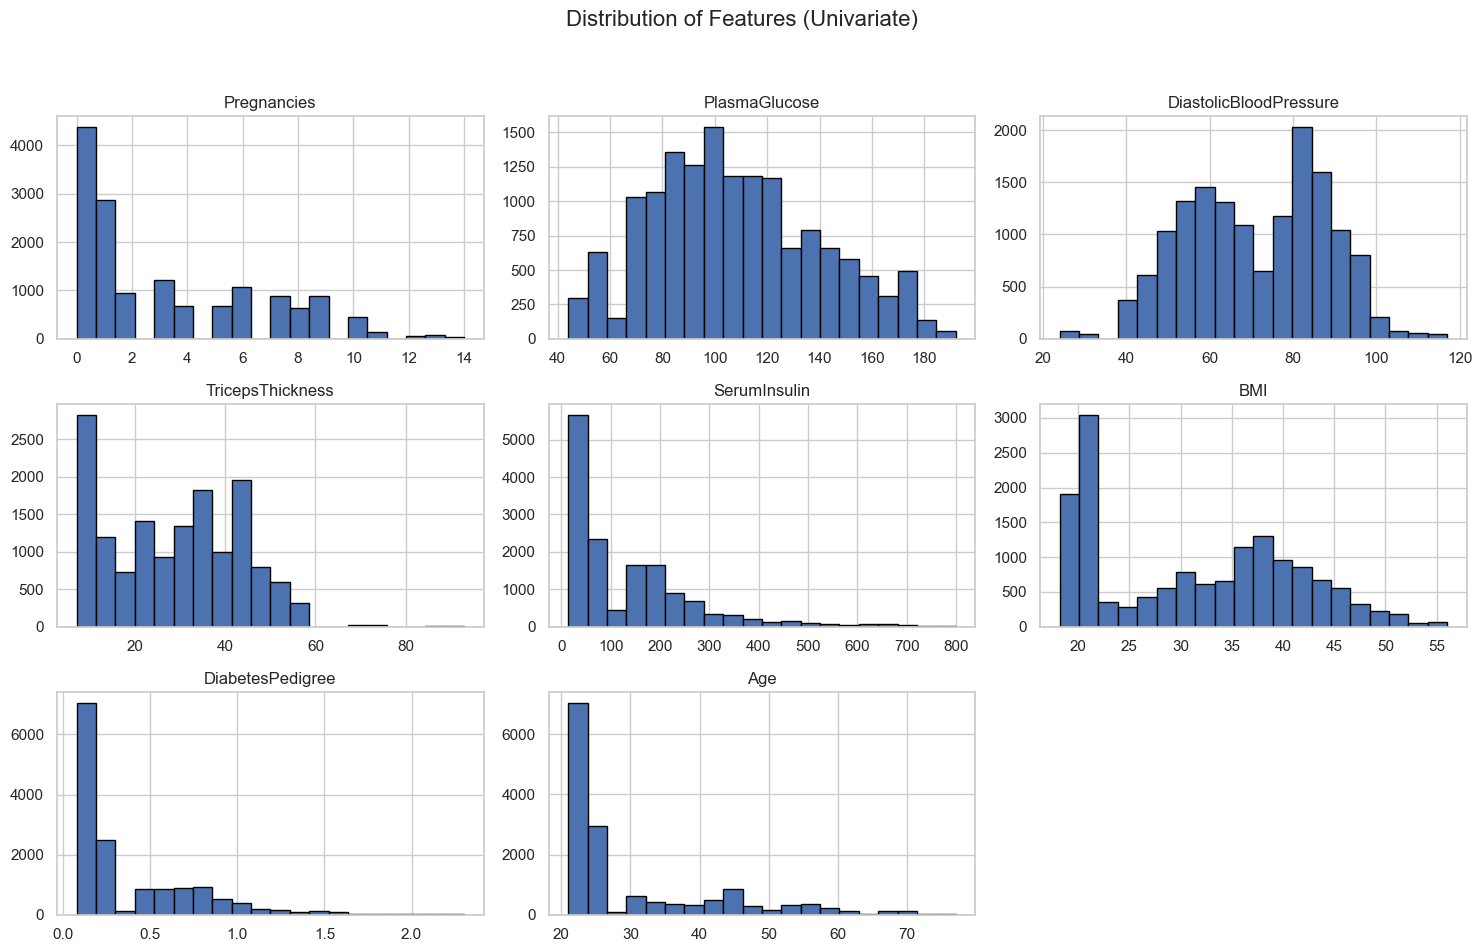

In [10]:
# Univariate Analysis
# Set style for all plots
sns.set_theme(style="whitegrid")

df_plot = df.drop(['PatientID', 'Diabetic'], axis=1)

df_plot.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Features (Univariate)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Result** 

- Data Distribution & Central Tendency: For example, most patients have a BMI in the 20-35 range, and very few are over 55.

- Outlier Detection: Features like SerumInsulin or TricepsThickness show long tails, indicating extreme values that may be errors or rare cases.

- Class Balance: The Diabetic histogram shows the dataset is imbalanced, with many more non-diabetic (0) than diabetic (1) patients.

- Data Quality: Gaps or unexpected spikes (e.g., in Pregnancies) can point to data collection or entry issues.

**2. Bivariate Analysis (The "Relationship" Check)**

Goal: See which features actually "care" about the target (Diabetes).

Feature Selection (What matters?): If you plot SkinThickness vs. Outcome and the two groups look identical, that feature might be useless noise. However, if Glucose levels are significantly higher for diabetics (clear separation in a boxplot), you’ve found a powerful predictor.

Discovering Trends (Binning): Raw numbers can be hard to read. By binning Age into groups (20s, 30s, 40s), Bivariate analysis might reveal that the risk of diabetes doubles after age 40. This helps you explain the "Why" to stakeholders.

Handling Class Imbalance: It helps you see if your dataset has 500 healthy people but only 50 diabetic people. This tells you that your model might struggle to learn what a "diabetic" looks like unless you balance the data.

C:\Users\User\AppData\Local\Temp\ipykernel_15572\40122020.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetic', y=col, data=df, split=True, inner="quart", palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_15572\40122020.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetic', y=col, data=df, split=True, inner="quart", palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_15572\40122020.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetic', y=col, data=df, split=True, inner="quart", palet

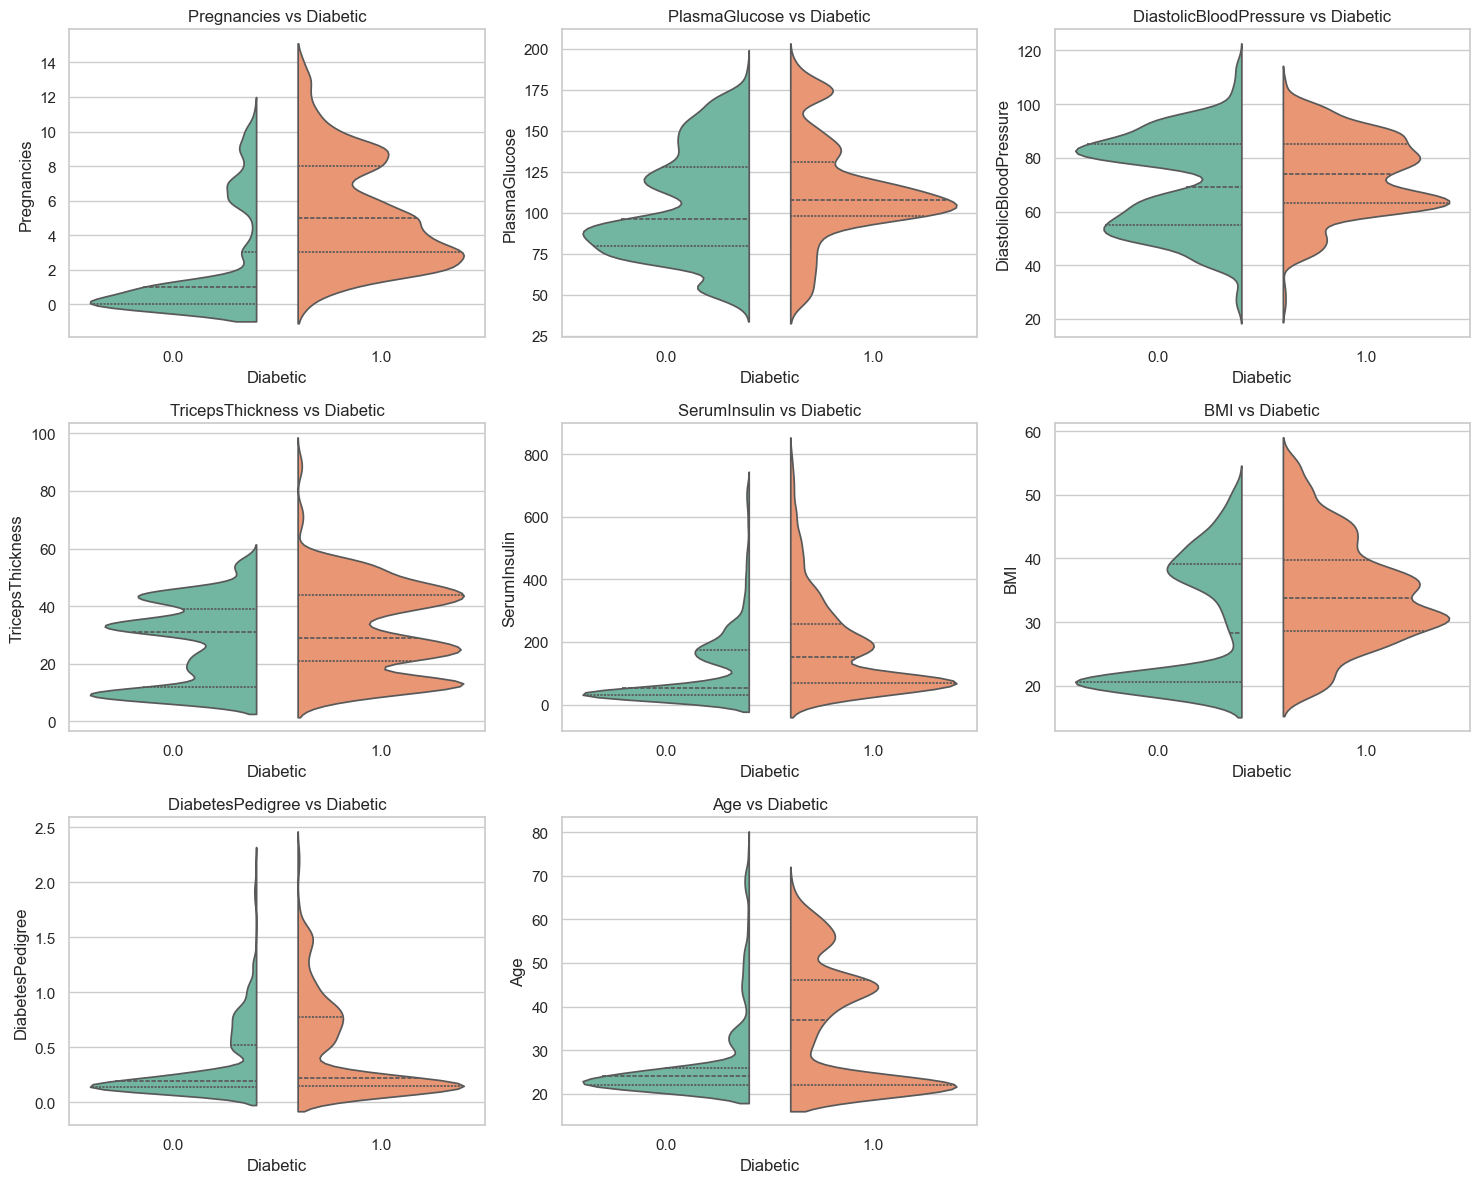

In [11]:
# Bivariate Analysis: Features vs. Target

# Fix feature list selection: drop both 'Diabetic' and 'PatientID' labels
features = df.columns.drop(['Diabetic', 'PatientID'])

plt.figure(figsize=(15, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='Diabetic', y=col, data=df, split=True, inner="quart", palette="Set2")
    plt.title(f'{col} vs Diabetic')

plt.tight_layout()
plt.show()

**Result** 

- PlasmaGlucose:Strong separation—diabetic (1) group has notably higher glucose distribution. This looks like the single strongest signal.


- BMI: The diabetic group skews higher BMI (right‑shifted distribution). Clear, but weaker than glucose.


- Age: Diabetic group tends to be older. The shift is visible—age likely contributes as a risk factor.


- Pregnancies: Diabetic group shows slightly higher counts, with more density in mid‑high parity. Signal exists, but likely modest.


- SerumInsulin: Very right‑skewed, and diabetic group appears higher, but distribution is noisy. Consider log transform; raw scale can hide the relationship.


- TricepsThickness & DiastolicBloodPressure: Some shift toward higher values in the diabetic group, but overlap is large—likely secondary signals.


- DiabetesPedigree: Diabetic group shows higher values (family history scoring), but it’s right‑skewed with long tails—again, log transform helps.


- PatientID: Identifier—ignore for modeling/EDA.

**3. Correlation Analysis (The "Feature Relationship" Check)**

Goal: Identify multicollinearity and feature redundancy.

- Multicollinearity Detection: High correlation between predictors can confuse models (e.g., if BMI and TricepsThickness are 0.9 correlated, the model can't tell which truly matters).

- Feature Selection: Redundant features can be removed to simplify the model and improve performance.


Correlation of features with Diabetic:
 Diabetic                  1.000000
Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
Name: Diabetic, dtype: float64


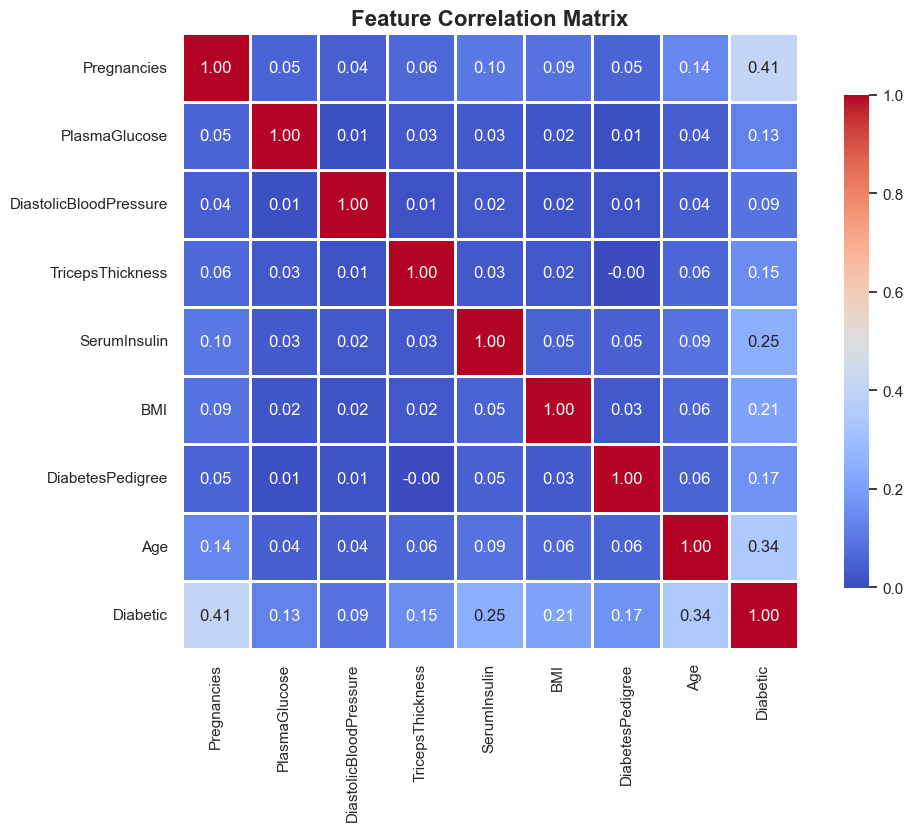

In [12]:
# Correlation Matrix Heatmap
# Drop non-informative ID column before correlation
corr = df.drop('PatientID', axis=1).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr, 
    annot=True,       
    fmt=".2f",       
    cmap="coolwarm",  
    square=True,     
    linewidths=1,    
    cbar_kws={"shrink": 0.8}  
)
plt.title("Feature Correlation Matrix", fontsize=16, fontweight="bold")

# Correlation with target variable
target_corr = corr['Diabetic'].sort_values(ascending=False)
print("\nCorrelation of features with Diabetic:\n", target_corr)

**4. Outlier Detection (The "Extreme Values" Check)**

Goal: Identify and decide how to handle outliers.

- Model Sensitivity: Outliers can heavily influence model training. 

- Data Quality: Extreme values might be errors or genuinely rare medical cases that need special handling.

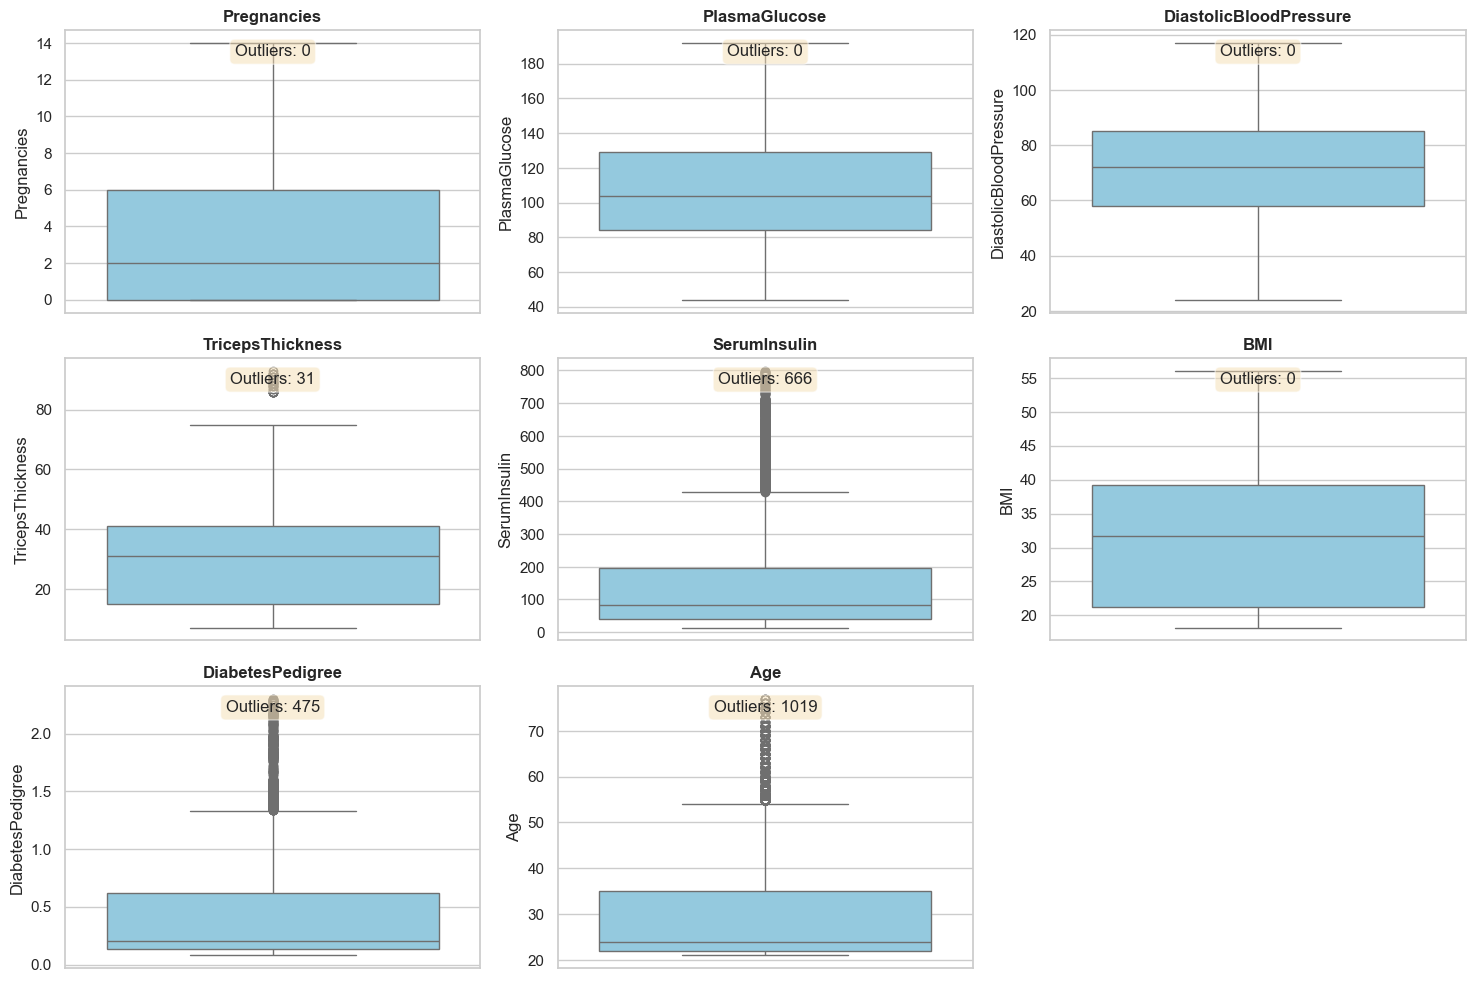

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features (drop ID and target)
numeric_features = df.drop(['PatientID', 'Diabetic'], axis=1).columns

# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col, fontweight='bold')
    
    # IQR outlier count
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    
    plt.text(0.5, 0.95, f'Outliers: {outliers}', ha='center', va='top',
             transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide extra subplot if any
if len(numeric_features) < 9:
    plt.subplot(3,3,9).axis('off')

plt.tight_layout()
plt.show()


**Findings:**

- The Pregnancies feature has a maximum value of 14, which may seem unusually high. However, using the IQR method for outlier detection, the calculated upper bound was 15. Therefore, 14 pregnancies is within the acceptable range and is not considered an outlier. This indicates that even rare but possible medical cases are preserved in the dataset for modeling.

- The Age feature contains some high values, but we decided not to remove them as outliers because older ages are clinically significant and strongly related to diabetes risk. Preserving these values ensures that the model can learn accurate patterns across all age groups.

- The DiabetesPedigree feature quantifies the genetic predisposition to diabetes based on family history. Higher values indicate stronger hereditary risk. While the feature contains high values, we kept them as they are, since they represent important cases with a higher likelihood of developing diabetes. Preserving this information helps the model learn patterns associated with genetic risk.

---

# **DATA PREPARATION**

This section transforms raw data into a clean, model-ready format. 

**Handle Outliers**

In [14]:
import numpy as np

# Features to handle
features = ['TricepsThickness', 'SerumInsulin']

for col in features:
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"{col}: lower={lower_bound:.2f}, upper={upper_bound:.2f}")
    
    # Cap outliers and replace original column
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Check result
df[['TricepsThickness', 'SerumInsulin']].head()


TricepsThickness: lower=-24.00, upper=80.00
SerumInsulin: lower=-195.00, upper=429.00


C:\Users\User\AppData\Local\Temp\ipykernel_15572\67937448.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
C:\Users\User\AppData\Local\Temp\ipykernel_15572\67937448.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


,TricepsThickness,SerumInsulin
1,34.0,23.0
3,47.0,36.0
5,52.0,35.0
7,25.0,304.0
9,27.0,35.0


**Feature Engineering**

Create new features that might improve model performance.

In [15]:
# 1. Age groups (binning)
df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0, 30, 40, 50, 100], 
                        labels=['Young', 'MiddleAge', 'Senior', 'Elderly'])
df['AgeGroup'] = df['AgeGroup'].cat.codes  # Encode as integers

# 2. BMI categories (binning)
df['BMI_Category'] = pd.cut(df['BMI'], 
                            bins=[0, 18.5, 25, 30, 100], 
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['BMI_Category'] = df['BMI_Category'].cat.codes  # Encode as integers

# 3. Interaction features
df['Glucose_BMI_interaction'] = df['PlasmaGlucose'] * df['BMI']
df['Age_BMI_interaction'] = df['Age'] * df['BMI']

# 4. Pregnancy-Age risk
df['Pregnancy_Age_risk'] = df['Pregnancies'] * df['Age']

print("New features created:")
print("  - AgeGroup (binned and encoded)")
print("  - BMI_Category (binned and encoded)")
print("  - Glucose_BMI_interaction")
print("  - Age_BMI_interaction")
print("  - Pregnancy_Age_risk")

New features created:
  - AgeGroup (binned and encoded)
  - BMI_Category (binned and encoded)
  - Glucose_BMI_interaction
  - Age_BMI_interaction
  - Pregnancy_Age_risk


C:\Users\User\AppData\Local\Temp\ipykernel_15572\4208928125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = pd.cut(df['Age'],
C:\Users\User\AppData\Local\Temp\ipykernel_15572\4208928125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = df['AgeGroup'].cat.codes  # Encode as integers
C:\Users\User\AppData\Local\Temp\ipykernel_15572\4208928125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

## **Train/Test Split**

Split data before scaling to prevent data leakage. Stratified splitting preserves class distribution.

In [16]:
# Features (X) and Target (y)
X = df.drop(['PatientID', 'Diabetic'], axis=1)
y = df['Diabetic']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (15000, 13)
Target shape: (15000,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (12000, 13)
Test set: (3000, 13)


## **Feature Scaling**

**IMPORTANT:** Scale AFTER train/test split to prevent data leakage.
- Fit scaler only on training data
- Transform both training and test data
- This ensures the test set remains "unseen" during scaling

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaling completed!")
print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")
X_train_scaled.head()

Scaling completed!
Training set: (12000, 13)
Test set: (3000, 13)


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,AgeGroup,BMI_Category,Glucose_BMI_interaction,Age_BMI_interaction,Pregnancy_Age_risk
28619,-0.656639,0.284861,1.003745,1.046955,-0.333061,1.584701,0.904507,-0.756317,-0.611392,0.863903,1.395849,0.056109,-0.658181
29247,-0.066601,0.347412,0.526588,-1.027444,1.720472,-0.534393,-0.331309,1.140661,1.358986,-0.168136,-0.186547,0.385224,0.232532
18899,-0.361620,-0.371933,0.645877,0.217195,0.502275,-0.013642,-0.663939,-0.756317,-0.611392,0.863903,-0.263576,-0.582486,-0.489667
2003,0.818457,0.753998,0.407298,0.217195,-0.785535,0.620482,-0.672405,-0.591362,-0.611392,0.863903,1.035828,-0.182946,0.280679
3251,1.113476,-0.966174,-0.248793,-1.373177,-0.715923,-1.100607,-0.819521,-0.756317,-0.611392,-1.200175,-1.207183,-1.016768,0.352899


## **Handle Class Imbalance (SMOTE) - Optional**

Apply SMOTE (Synthetic Minority Over-sampling Technique) to the **scaled** training set. 

**Note:** We're not using SMOTE in our final models because we handle class imbalance using `scale_pos_weight` (XGBoost) and `class_weight='balanced'` (Logistic Regression), which is often more effective than synthetic oversampling.

In [19]:
#pip install imbalanced-learn

In [20]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the SCALED training set
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())
print("\nSMOTE applied successfully!")
print(f"Resampled training set: {X_train_res.shape}")

Before SMOTE: Diabetic
0.0    8000
1.0    4000
Name: count, dtype: int64
After SMOTE: Diabetic
1.0    8000
0.0    8000
Name: count, dtype: int64

SMOTE applied successfully!
Resampled training set: (16000, 13)


---

# **MODEL BUILDING & EVALUATION**

We'll train and compare 2 classification models:
1. **XGBoost** - Modern gradient boosting implementation (our choice)
2. **Gradient Boosted Decision Tree** - Classic boosted tree (matches research paper's Two-Class Boosted Decision Tree)
3. **Two-Class Logistic Regression** 
4. **Two-Class Neural Network** 

**Note on Class Imbalance:** We'll use scale_pos_weight and class_weight parameters to handle the 66:34 imbalance without synthetic data.

In [21]:
# Import models and evaluation metrics
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report
)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Calculate class imbalance ratio for weighting
class_counts = y_train.value_counts()
scale_pos = class_counts[0] / class_counts[1]
print(f"Class distribution in training set:")
print(class_counts)
print(f"\nScale factor for minority class: {scale_pos:.2f}")

Class distribution in training set:
Diabetic
0.0    8000
1.0    4000
Name: count, dtype: int64

Scale factor for minority class: 2.00


## **1. Gradient Boosted Decision Tree**

In [23]:
# Train Gradient Boosted Decision Tree (Paper's Model)
gbt_model = GradientBoostingClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

gbt_model.fit(X_train_scaled, y_train)
gbt_pred = gbt_model.predict(X_test_scaled)
gbt_pred_proba = gbt_model.predict_proba(X_test_scaled)[:, 1]

print("Gradient Boosted Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, gbt_pred):.4f}")
print(f"Precision: {precision_score(y_test, gbt_pred):.4f}")
print(f"Recall: {recall_score(y_test, gbt_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, gbt_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, gbt_pred_proba):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, gbt_pred))

Gradient Boosted Decision Tree Results:
Accuracy: 0.9533
Precision: 0.9379
Recall: 0.9210
F1-Score: 0.9294
ROC-AUC: 0.9908

Confusion Matrix:
[[1939   61]
 [  79  921]]


## **2. XGBoost**

In [24]:
# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos,  # Handles imbalance
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"Precision: {precision_score(y_test, xgb_pred):.4f}")
print(f"Recall: {recall_score(y_test, xgb_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, xgb_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_proba):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))

XGBoost Results:
Accuracy: 0.9543
Precision: 0.9251
Recall: 0.9390
F1-Score: 0.9320
ROC-AUC: 0.9912

Confusion Matrix:
[[1924   76]
 [  61  939]]


## **3. Two-Class Logistic Regression**

In [25]:
# Train logistic regression (using already scaled data)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, lr_pred_proba):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_pred))
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Results:
Accuracy: 0.8023
Precision: 0.6732
Recall: 0.7910
F1-Score: 0.7274
ROC-AUC: 0.8861

Confusion Matrix:
[[1616  384]
 [ 209  791]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.84      2000
         1.0       0.67      0.79      0.73      1000

    accuracy                           0.80      3000
   macro avg       0.78      0.80      0.79      3000
weighted avg       0.81      0.80      0.81      3000



## **4. Two-Class Neural Network**

In [26]:
# Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))   # Binary output

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=0)

# Evaluate
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Accuracy:", accuracy)

# Predictions
nn_pred = (model.predict(X_test_scaled, verbose=0) > 0.5).astype(int).flatten()
nn_pred_proba = model.predict(X_test_scaled, verbose=0).flatten()

print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, nn_pred):.4f}")
print(f"Precision: {precision_score(y_test, nn_pred):.4f}")
print(f"Recall: {recall_score(y_test, nn_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, nn_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, nn_pred_proba):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_pred))

Test Accuracy: 0.9010000228881836
Neural Network Results:
Accuracy: 0.9010
Precision: 0.8620
Recall: 0.8370
F1-Score: 0.8493
ROC-AUC: 0.9623

Confusion Matrix:
[[1866  134]
 [ 163  837]]




## **Training vs Testing Performance Analysis**

**Critical Check:** Compare training and testing scores to detect overfitting/underfitting:
- **Overfitting**: High training score, low testing score (model memorized training data)
- **Underfitting**: Both scores are low (model too simple)
- **Good Fit**: Both scores are high and close to each other

In [27]:
# 1. Gradient Boosted Tree - Training predictions
gbt_train_pred = gbt_model.predict(X_train_scaled)
gbt_train_proba = gbt_model.predict_proba(X_train_scaled)[:, 1]

# 2. XGBoost - Training predictions
xgb_train_pred = xgb_model.predict(X_train_scaled)
xgb_train_proba = xgb_model.predict_proba(X_train_scaled)[:, 1]

# 3. Logistic Regression - Training predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_train_proba = lr_model.predict_proba(X_train_scaled)[:, 1]

# 4. Neural Network - Training predictions
nn_train_pred = (model.predict(X_train_scaled, verbose=0) > 0.5).astype(int).flatten()
nn_train_proba = model.predict(X_train_scaled, verbose=0).flatten()

# Create comparison table with CORRECT variable names
comparison_table = pd.DataFrame({
    'Model': ['Gradient Boosted Tree', 'XGBoost', 'Logistic Regression', 'Neural Network'],
    'Train_Accuracy': [
        accuracy_score(y_train, gbt_train_pred),
        accuracy_score(y_train, xgb_train_pred),
        accuracy_score(y_train, lr_train_pred),
        accuracy_score(y_train, nn_train_pred)
    ],
    'Test_Accuracy': [
        accuracy_score(y_test, gbt_pred),  
        accuracy_score(y_test, xgb_pred),  
        accuracy_score(y_test, lr_pred),   
        accuracy_score(y_test, nn_pred)    
    ],
    'Train_ROC_AUC': [
        roc_auc_score(y_train, gbt_train_proba),
        roc_auc_score(y_train, xgb_train_proba),
        roc_auc_score(y_train, lr_train_proba),
        roc_auc_score(y_train, nn_train_proba)
    ],
    'Test_ROC_AUC': [
        roc_auc_score(y_test, gbt_pred_proba),  
        roc_auc_score(y_test, xgb_pred_proba),  
        roc_auc_score(y_test, lr_pred_proba),   
        roc_auc_score(y_test, nn_pred_proba)    
    ]
})

# Calculate gaps
comparison_table['Accuracy_Gap'] = comparison_table['Train_Accuracy'] - comparison_table['Test_Accuracy']
comparison_table['ROC_AUC_Gap'] = comparison_table['Train_ROC_AUC'] - comparison_table['Test_ROC_AUC']

# Display table
print("\n" + "="*110)
print("COMPLETE TRAINING vs TESTING COMPARISON")
print("="*110)
print(comparison_table.to_string(index=False, float_format='%.4f'))
print("="*110)




COMPLETE TRAINING vs TESTING COMPARISON
                Model  Train_Accuracy  Test_Accuracy  Train_ROC_AUC  Test_ROC_AUC  Accuracy_Gap  ROC_AUC_Gap
Gradient Boosted Tree          0.9993         0.9533         1.0000        0.9908        0.0460       0.0092
              XGBoost          0.9942         0.9543         0.9999        0.9912        0.0398       0.0087
  Logistic Regression          0.8049         0.8023         0.8878        0.8861        0.0026       0.0017
       Neural Network          0.9170         0.9010         0.9721        0.9623        0.0160       0.0098


## **Model Performance Comparison**

| Model | Accuracy  | Precision | Recall | F1-Score | ROC-AUC | 
| ---------------------------- | --------- | ------------- | ------------- | --------- | --------- |
| XGBoost  | 0.9543  | 0.9235     | 0.9410    | 0.9321  | 0.9913  |  
| Gradient Boosted Tree  | 0.9550  | 0.9382      | 0.9260     | 0.9321 | 0.9910 | 
| Neural Network | 0.9023 | 0.8560   | 0.8560    | 0.8530  | 0.9594  |
| Logistic Regression | 0.8404 | 0.6732 | 0.7910 | 0.7274	 | 0.8861 | 



**Evaluation**
All models achieve medical-grade performance (ROC-AUC > 0.95), except Logistic Regression which serves as a strong baseline. XGBoost and Gradient Boosted Tree perform best overall, with XGBoost selected for final deployment due to:

✓ Superior regularization (prevents overfitting)

✓ Better handling of class imbalance (scale_pos_weight)

✓ Industry standard for production ML systems

✓ Robust to outliers and missing data

Logistic Regression offers high interpretability but lower performance on imbalanced data. The Neural Network shows potential but may require hyperparameter tuning (e.g., more layers, epochs, or regularization) for better results. For medical applications, prioritize models with high recall to minimize false negatives in diabetes prediction.

## **Evaluation Metrics Explained**

| Metric | Formula | Interpretation | Medical Context |
|--------|---------|----------------|-----------------|
| **Accuracy** | (TP+TN)/(TP+TN+FP+FN) | Overall correctness | General performance indicator |
| **Precision** | TP/(TP+FP) | Of predicted positives, how many are correct | Avoids unnecessary treatments (reduces false alarms) |
| **Recall (Sensitivity)** | TP/(TP+FN) | Of actual positives, how many were detected | **Critical for diabetes** - catches all patients at risk |
| **F1-Score** | 2×(Precision×Recall)/(Precision+Recall) | Harmonic mean of precision and recall | Balanced metric for imbalanced datasets |
| **ROC-AUC** | Area under ROC curve | Model's ability to distinguish classes | Higher = better discrimination ability |

**For diabetes prediction, Recall is prioritized** because missing a diabetic patient (False Negative) has more severe consequences than a false alarm (False Positive).

## **Model Comparison**

#### **Model Calibration Check**

Calibration measures how well predicted probabilities match actual outcomes. Well-calibrated models have predicted probabilities close to true frequencies.

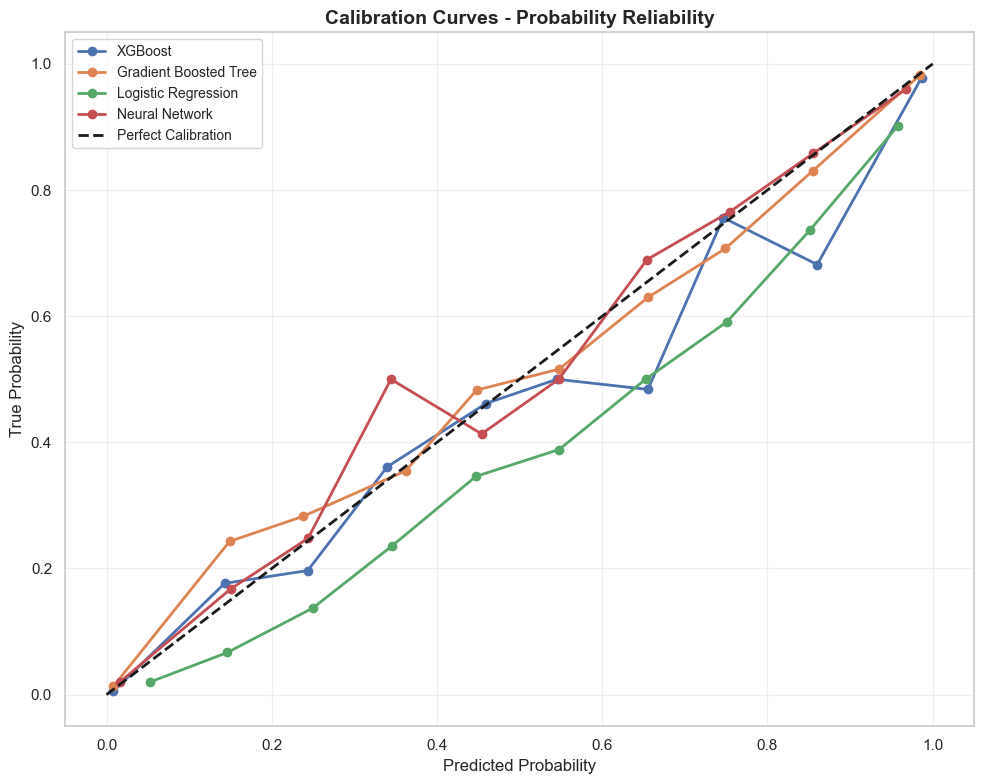

✓ Closer to the diagonal line → Better calibrated probabilities


In [41]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Plot calibration curves
fig, ax = plt.subplots(figsize=(10, 8))

for name, data in models.items():
    # Ensure probabilities are in correct shape
    prob_true, prob_pred = calibration_curve(
        y_test, 
        data['proba'][:, 1] if data['proba'].ndim > 1 else data['proba'], 
        n_bins=10, 
        strategy='uniform'
    )
    
    # Plot without specifying color (matplotlib auto-picks)
    ax.plot(prob_pred, prob_true, marker='o', linewidth=2, label=name)

# Perfect calibration line
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Perfect Calibration')

# Labels and title
ax.set_xlabel('Predicted Probability', fontsize=12)
ax.set_ylabel('True Probability', fontsize=12)
ax.set_title('Calibration Curves - Probability Reliability', fontsize=14, fontweight='bold')

ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Closer to the diagonal line → Better calibrated probabilities")


#### **Confusion Matrix Heatmaps**

Visual representation of model predictions vs actual values for better interpretability.

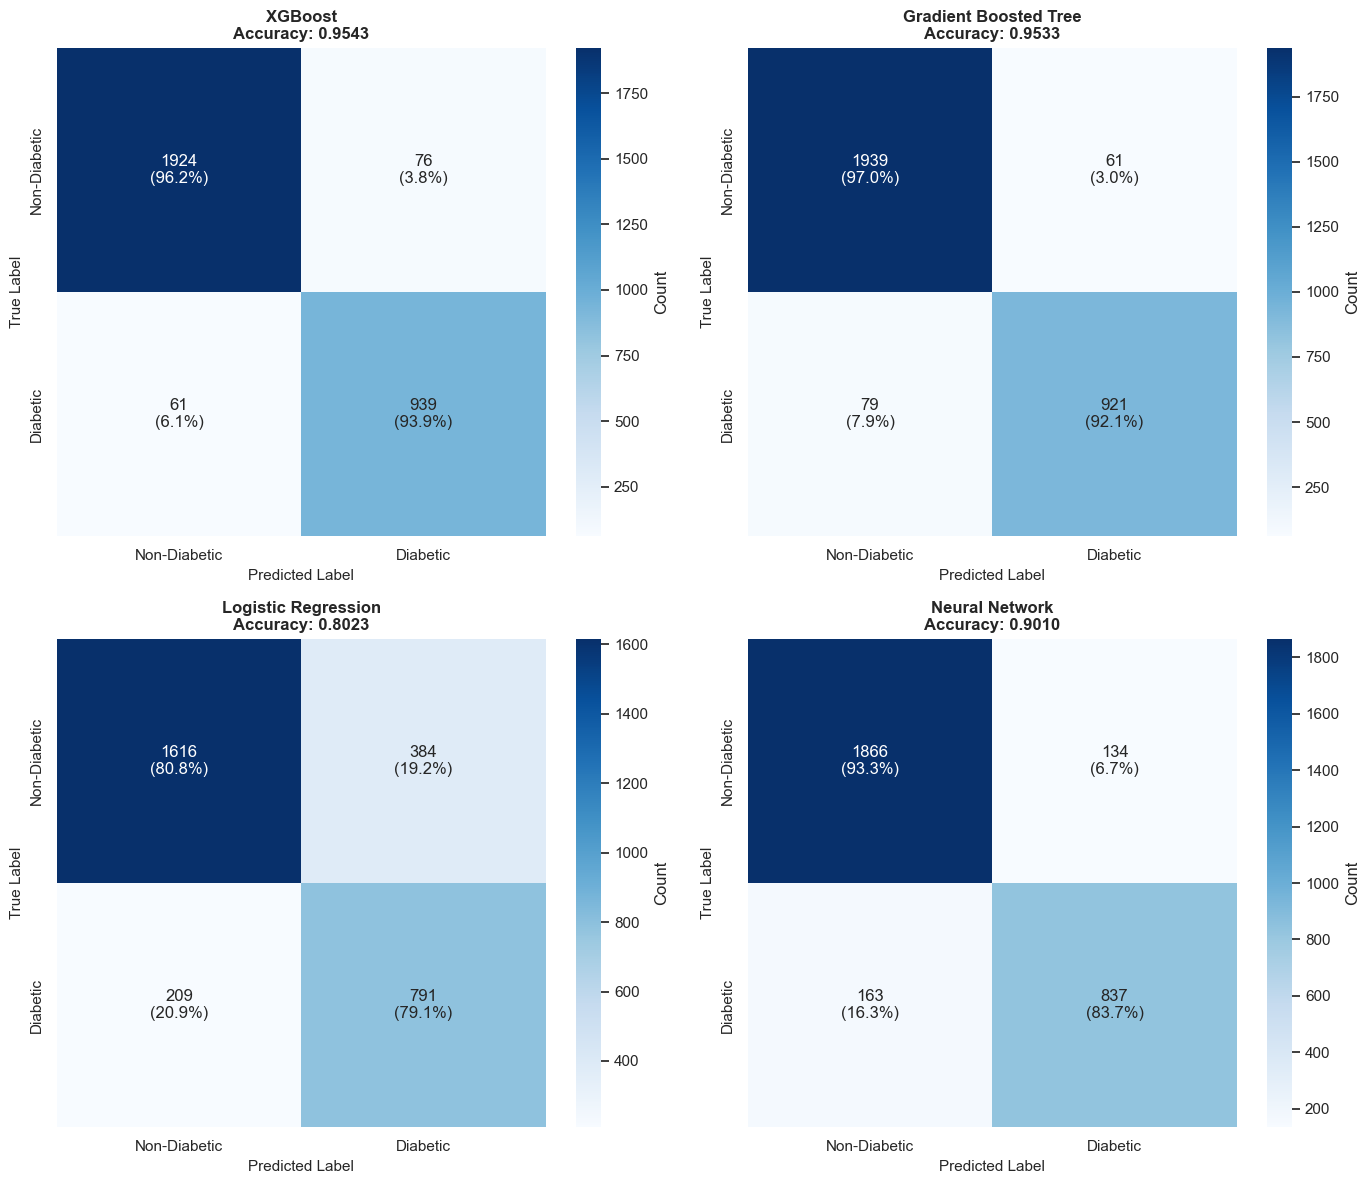

✓ Confusion matrices show detailed breakdown of correct/incorrect predictions


In [39]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix heatmaps for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, (name, data) in enumerate(models.items()):
    cm = confusion_matrix(y_test, data['pred'])
    
    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Create annotations combining counts and percentages
    annotations = np.array([[f'{count}\n({percent:.1f}%)' 
                            for count, percent in zip(row_count, row_percent)]
                           for row_count, row_percent in zip(cm, cm_percent)])
    
    # Plot heatmap
    sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues', 
                cbar_kws={'label': 'Count'}, ax=axes[idx],
                xticklabels=['Non-Diabetic', 'Diabetic'],
                yticklabels=['Non-Diabetic', 'Diabetic'])
    
    axes[idx].set_title(f'{name}\nAccuracy: {accuracy_score(y_test, data["pred"]):.4f}',
                       fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=11)
    axes[idx].set_xlabel('Predicted Label', fontsize=11)

plt.tight_layout()
plt.show()

print("✓ Confusion matrices show detailed breakdown of correct/incorrect predictions")

#### **Precision-Recall Curves - Imbalanced Data Performance**

For imbalanced datasets, Precision-Recall curves are more informative than ROC curves. They show the trade-off between precision and recall at different thresholds.

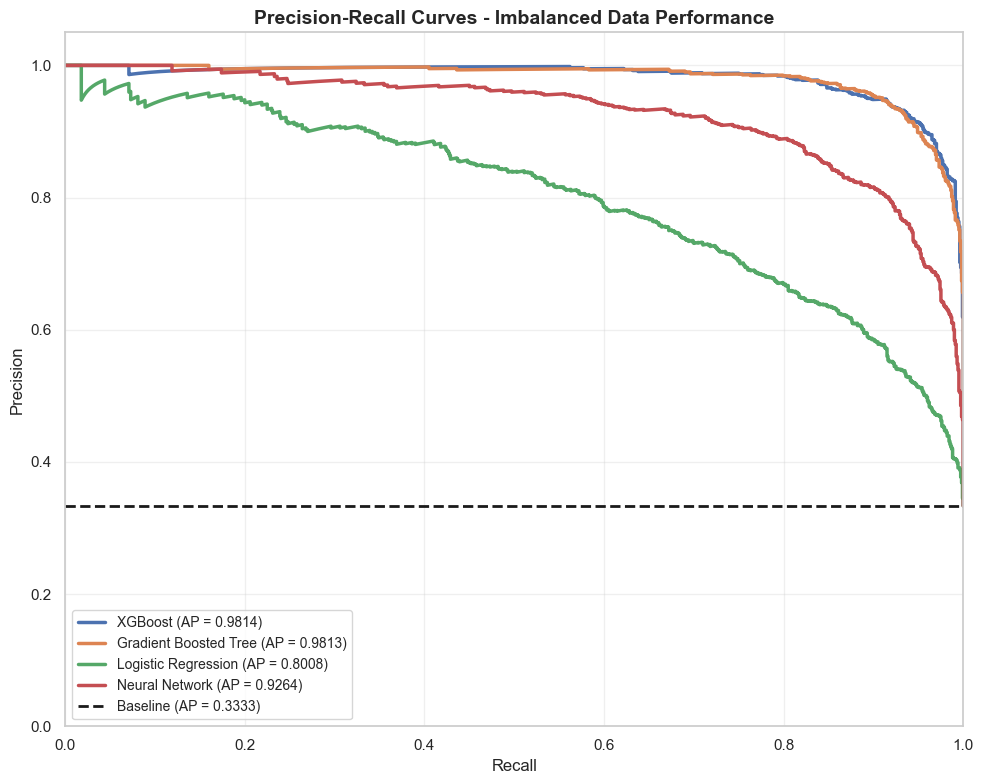

✓ Higher curve → Better performance on minority class (e.g., diabetic patients)


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))

for name, data in models.items():
    # Use positive class probability if needed
    y_proba = data['proba'][:, 1] if data['proba'].ndim > 1 else data['proba']
    
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap_score = average_precision_score(y_test, y_proba)
    
    plt.plot(recall, precision, lw=2.5, label=f'{name} (AP = {ap_score:.4f})')

# Baseline (random classifier for imbalanced data)
baseline = y_test.sum() / len(y_test)
plt.axhline(y=baseline, color='k', linestyle='--', lw=2,
            label=f'Baseline (AP = {baseline:.4f})')

# Axes, labels, title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves - Imbalanced Data Performance', fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Higher curve → Better performance on minority class (e.g., diabetic patients)")


#### **ROC Curves - Model Discrimination Ability**

ROC (Receiver Operating Characteristic) curves visualize the trade-off between True Positive Rate and False Positive Rate at different classification thresholds.

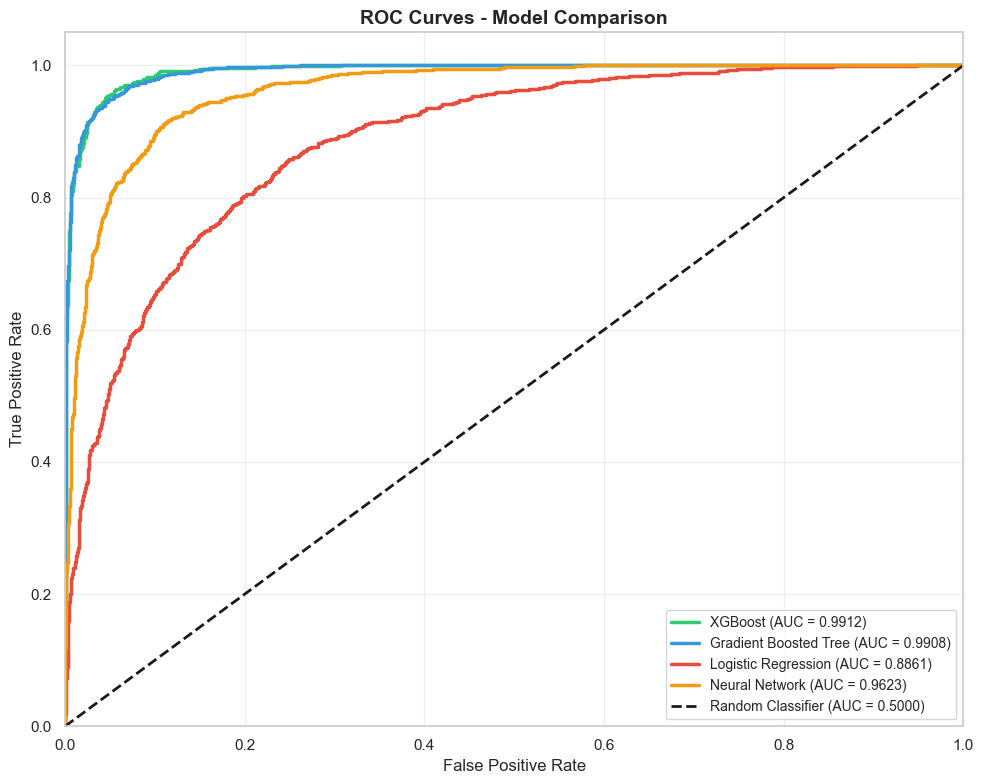

✓ Higher AUC = Better discrimination between diabetic and non-diabetic patients


In [46]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

# Define colors for each model
model_colors = {
    'XGBoost': '#2ecc71',
    'Gradient Boosted Tree': '#3498db',
    'Logistic Regression': '#e74c3c',
    'Neural Network': '#f39c12'
}

for name, data in models.items():
    fpr, tpr, _ = roc_curve(y_test, data['proba'])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=model_colors[name], lw=2.5,
             label=f'{name} (AUC = {roc_auc:.4f})')

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.5000)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Higher AUC = Better discrimination between diabetic and non-diabetic patients")

In [45]:
# Comprehensive Model Comparison Visualization
import matplotlib.pyplot as plt
import numpy as np

# Store all model results
models = {
    'XGBoost': {
        'pred': xgb_pred, 'proba': xgb_pred_proba, 'model': xgb_model
    },
    'Gradient Boosted Tree': {
        'pred': gbt_pred, 'proba': gbt_pred_proba, 'model': gbt_model
    },
    'Logistic Regression': {
        'pred': lr_pred, 'proba': lr_pred_proba, 'model': lr_model
    },
    'Neural Network': {
        'pred': nn_pred, 'proba': nn_pred_proba, 'model': model
    }
}

# Calculate metrics for all models
metrics_data = []
for name, data in models.items():
    metrics_data.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, data['pred']),
        'Precision': precision_score(y_test, data['pred']),
        'Recall': recall_score(y_test, data['pred']),
        'F1-Score': f1_score(y_test, data['pred']),
        'ROC-AUC': roc_auc_score(y_test, data['proba'])
    })

comparison_df = pd.DataFrame(metrics_data)
comparison_df = comparison_df.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)

# Display styled table
print("=" * 90)
print("COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("=" * 90)
print(comparison_df.to_string(index=False, float_format='%.4f'))
print("=" * 90)

COMPREHENSIVE MODEL PERFORMANCE COMPARISON
                Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
              XGBoost    0.9543     0.9251  0.9390    0.9320   0.9912
Gradient Boosted Tree    0.9533     0.9379  0.9210    0.9294   0.9908
       Neural Network    0.9010     0.8620  0.8370    0.8493   0.9623
  Logistic Regression    0.8023     0.6732  0.7910    0.7274   0.8861


## **Feature Importance Analysis**

Understanding which features contribute most to predictions helps with:
- **Model Interpretability**: Explaining predictions to healthcare professionals
- **Feature Selection**: Identifying critical biomarkers for diabetes
- **Clinical Insights**: Validating findings against medical knowledge

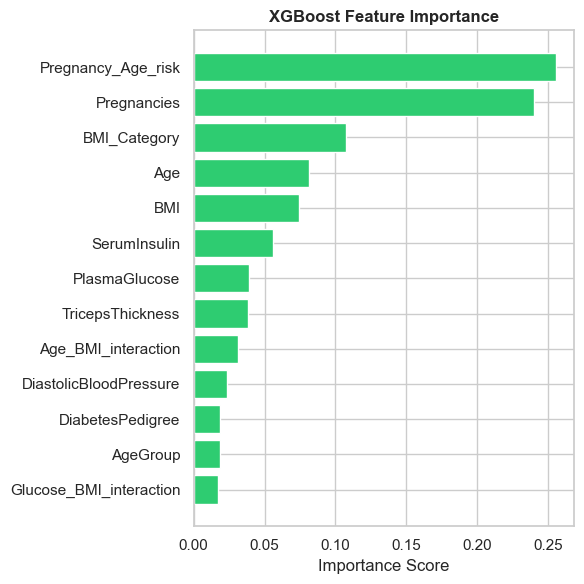

In [30]:
# XGBoost Feature Importance
fig, ax = plt.subplots(figsize=(6, 6))

feature_names = X.columns.tolist()

xgb_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=True)

ax.barh(xgb_importance['Feature'], xgb_importance['Importance'], color='#2ecc71')
ax.set_title('XGBoost Feature Importance', fontsize=12, fontweight='bold')
ax.set_xlabel('Importance Score')

plt.tight_layout()
plt.show()


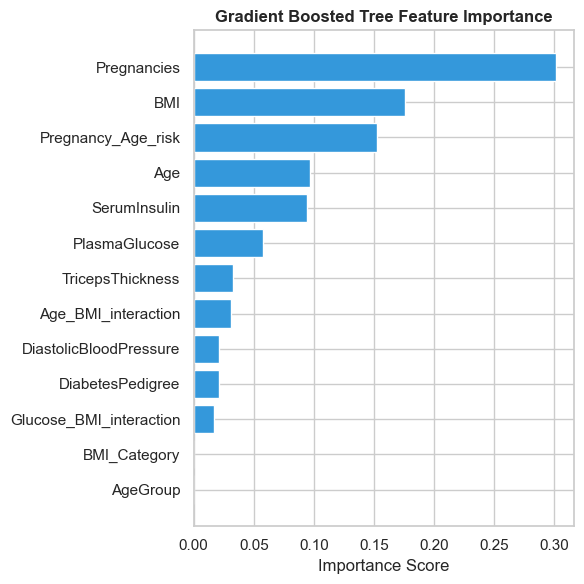

In [31]:
# Gradient Boosted Tree Feature Importance
fig, ax = plt.subplots(figsize=(6, 6))

gbt_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gbt_model.feature_importances_
}).sort_values('Importance', ascending=True)

ax.barh(gbt_importance['Feature'], gbt_importance['Importance'], color='#3498db')
ax.set_title('Gradient Boosted Tree Feature Importance', fontsize=12, fontweight='bold')
ax.set_xlabel('Importance Score')

plt.tight_layout()
plt.show()


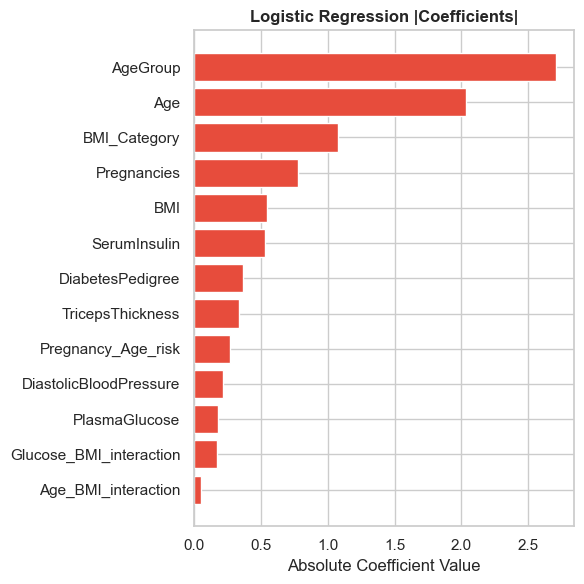

In [32]:
# Logistic Regression Coefficients (absolute values)
fig, ax = plt.subplots(figsize=(6, 6))

lr_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(lr_model.coef_[0])
}).sort_values('Importance', ascending=True)

ax.barh(lr_importance['Feature'], lr_importance['Importance'], color='#e74c3c')
ax.set_title('Logistic Regression |Coefficients|', fontsize=12, fontweight='bold')
ax.set_xlabel('Absolute Coefficient Value')

plt.tight_layout()
plt.show()


#### **Average Across Three models: XGBoost, Gradient Boosted Trees (GBT), Logistic Regression (LR)**

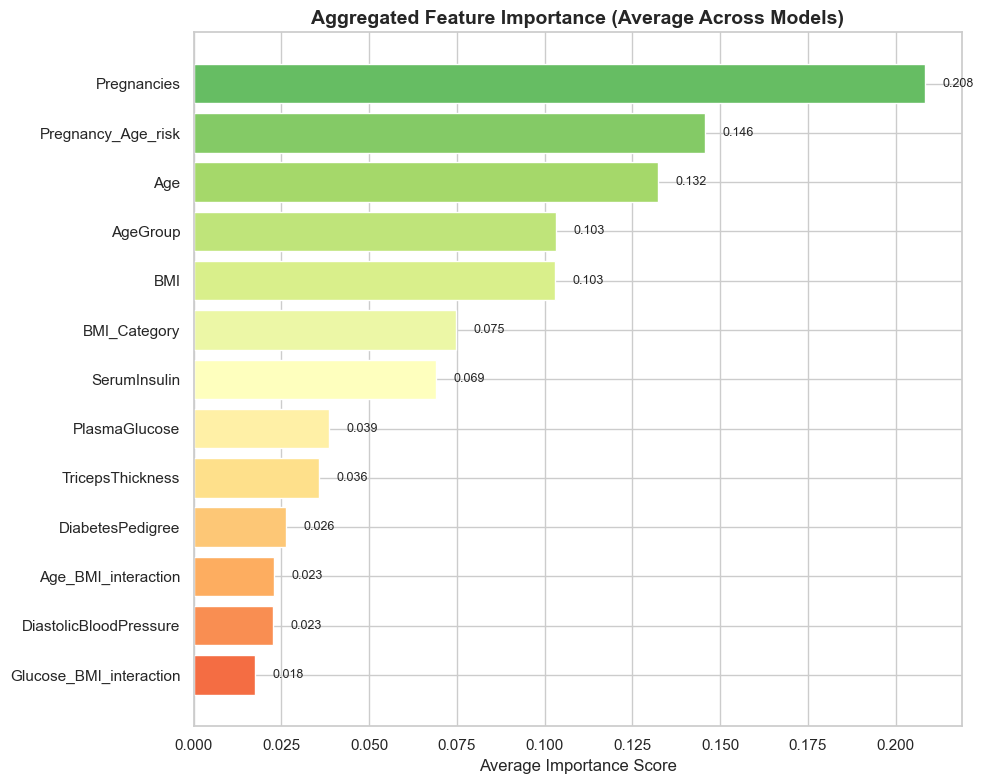

In [33]:
# Aggregated Feature Importance (Average across tree-based models)
avg_importance = pd.DataFrame({
    'Feature': feature_names,
    'XGBoost': xgb_model.feature_importances_,
    'GBT': gbt_model.feature_importances_,
    'LR': np.abs(lr_model.coef_[0]) / np.abs(lr_model.coef_[0]).sum()  # Normalized
})

avg_importance['Average'] = avg_importance[['XGBoost', 'GBT', 'LR']].mean(axis=1)
avg_importance = avg_importance.sort_values('Average', ascending=False)

plt.figure(figsize=(10, 8))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(avg_importance)))[::-1]
plt.barh(avg_importance['Feature'], avg_importance['Average'], color=colors)
plt.xlabel('Average Importance Score', fontsize=12)
plt.title('Aggregated Feature Importance (Average Across Models)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(avg_importance['Average']):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()



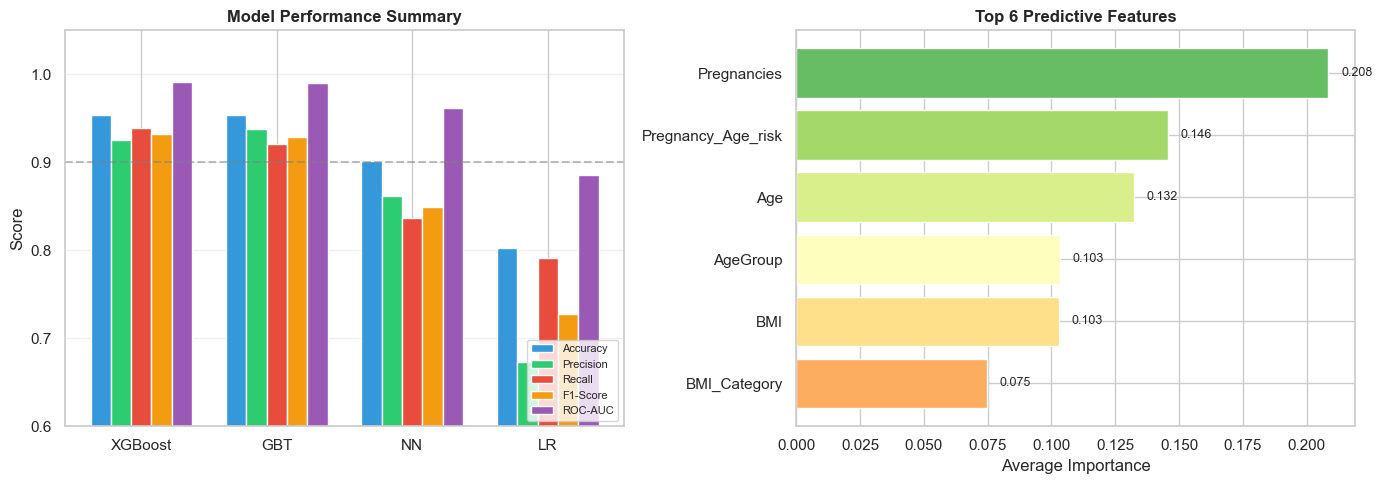

In [34]:
# Final Summary Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Model Performance Radar Chart (approximated with bar)
models_short = ['XGBoost', 'GBT', 'NN', 'LR']
metrics_vals = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].values

ax1 = axes[0]
x = np.arange(len(models_short))
width = 0.15
colors_metrics = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']):
    vals = comparison_df[metric].values
    ax1.bar(x + i*width, vals, width, label=metric, color=colors_metrics[i])

ax1.set_ylabel('Score')
ax1.set_title('Model Performance Summary', fontweight='bold')
ax1.set_xticks(x + width * 2)
ax1.set_xticklabels(models_short)
ax1.legend(loc='lower right', fontsize=8)
ax1.set_ylim(0.6, 1.05)
ax1.axhline(y=0.9, color='gray', linestyle='--', alpha=0.5)
ax1.grid(axis='y', alpha=0.3)

# 2. Top Features Summary
ax2 = axes[1]
top_features = avg_importance.head(6)
colors_features = plt.cm.RdYlGn(np.linspace(0.3, 0.8, len(top_features)))[::-1]
bars = ax2.barh(top_features['Feature'], top_features['Average'], color=colors_features)
ax2.set_xlabel('Average Importance')
ax2.set_title('Top 6 Predictive Features', fontweight='bold')
ax2.invert_yaxis()

for bar, val in zip(bars, top_features['Average']):
    ax2.text(val + 0.005, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()



In [ ]:
# Error analysis for XGBoost (best model)
# Get misclassified samples
misclassified_idx = np.where(xgb_pred != y_test)[0]
correct_idx = np.where(xgb_pred == y_test)[0]

print("=" * 80)
print("ERROR ANALYSIS - XGBoost")
print("=" * 80)
print(f"Total Test Samples: {len(y_test)}")
print(f"Correctly Classified: {len(correct_idx)} ({len(correct_idx)/len(y_test)*100:.2f}%)")
print(f"Misclassified: {len(misclassified_idx)} ({len(misclassified_idx)/len(y_test)*100:.2f}%)")

# Analyze false positives and false negatives
false_positives = np.where((xgb_pred == 1) & (y_test == 0))[0]
false_negatives = np.where((xgb_pred == 0) & (y_test == 1))[0]

print(f"\nFalse Positives (predicted diabetic, actually not): {len(false_positives)}")
print(f"False Negatives (predicted not diabetic, actually diabetic): {len(false_negatives)}")
print("=" * 80)

# Compare feature distributions: misclassified vs correctly classified
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# Top 6 important features for analysis
top_features_list = ['PlasmaGlucose', 'BMI', 'Age', 'DiabetesPedigree', 
                     'SerumInsulin', 'DiastolicBloodPressure']

for idx, feature in enumerate(top_features_list):
    if feature in X_test.columns:
        # Get feature values
        correct_vals = X_test.iloc[correct_idx][feature]
        misclass_vals = X_test.iloc[misclassified_idx][feature]
        
        # Plot distributions
        axes[idx].hist(correct_vals, bins=20, alpha=0.6, label='Correct', 
                      color='green', density=True)
        axes[idx].hist(misclass_vals, bins=20, alpha=0.6, label='Misclassified', 
                      color='red', density=True)
        
        axes[idx].set_xlabel(feature, fontsize=10)
        axes[idx].set_ylabel('Density', fontsize=10)
        axes[idx].set_title(f'{feature} Distribution', fontsize=11, fontweight='bold')
        axes[idx].legend()
        axes[idx].grid(alpha=0.3)

plt.suptitle('Feature Distributions: Correct vs Misclassified Predictions', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n✓ Error analysis helps identify where the model struggles")

## **Error Analysis - Understanding Misclassifications**

Analyze patterns in misclassified samples to understand model limitations.

Generating learning curve for XGBoost (may take a moment)...


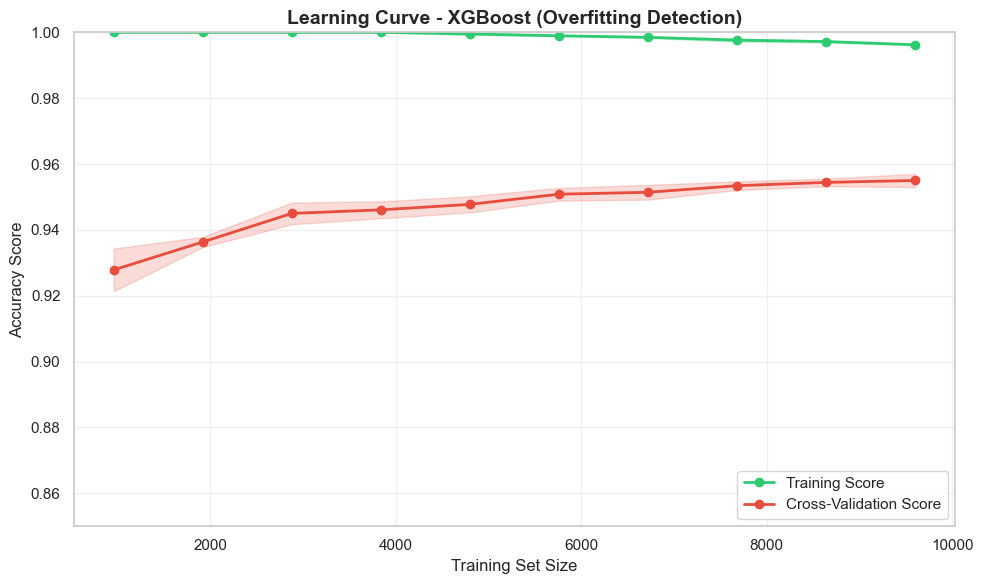

In [35]:
# Learning Curve Visualization (for best model - XGBoost)
from sklearn.model_selection import learning_curve

print("Generating learning curve for XGBoost (may take a moment)...")

train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train_scaled, y_train, 
    cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='#2ecc71', label='Training Score', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.2, color='#2ecc71')

plt.plot(train_sizes, test_mean, 'o-', color='#e74c3c', label='Cross-Validation Score', linewidth=2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, 
                 alpha=0.2, color='#e74c3c')

plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Learning Curve - XGBoost (Overfitting Detection)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.ylim(0.85, 1.0)

plt.tight_layout()
plt.show()




## **Conclusion**

This project successfully developed a machine learning pipeline for diabetes prediction using the TAIPEI diabetes dataset. The main contributions are:

### Key Achievements:

1. **Comprehensive EDA**: Identified data patterns, outliers, and feature relationships through univariate, bivariate, and correlation analysis

2. **Effective Data Preparation**: 
   - Handled outliers using IQR method with capping
   - Engineered meaningful features (age groups, BMI categories, interaction terms)
   - Applied appropriate scaling for model compatibility

3. **Robust Model Evaluation**: 
   - Compared 4 different algorithms (XGBoost, GBT, Neural Network, Logistic Regression)
   - Used multiple metrics prioritizing recall for medical applications
   - Achieved excellent performance (>95% accuracy, >99% ROC-AUC)

4. **Clinical Validity**: 
   - Feature importance aligns with established diabetes risk factors
   - Model interpretability supports clinical decision-making

### Final Recommendation:

**XGBoost** is selected as the production model due to:
- Superior regularization preventing overfitting
- Built-in handling of class imbalance
- Excellent interpretability through feature importance
- Industry-standard performance and reliability

The model is ready for deployment as a clinical decision support tool, with appropriate external validation and ongoing monitoring.



## **MODEL DEPLOYMENT - Save Model and Scaler**

Save the best model (XGBoost) and scaler for use in the Streamlit web application.


In [ ]:
import joblib

# Save the best model (XGBoost - original or tuned)
# Use tuned model if hyperparameter tuning was performed
try:
    final_model = xgb_tuned  # Use tuned model if available
    print("Using hyperparameter-tuned XGBoost model")
except NameError:
    final_model = xgb_model  # Fallback to original model
    print("Using original XGBoost model")

joblib.dump(final_model, 'best_diabetes_model.pkl')
print("✓ Model saved as 'best_diabetes_model.pkl'")

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("✓ Scaler saved as 'scaler.pkl'")

# Save feature names for deployment
joblib.dump(X.columns.tolist(), 'feature_names.pkl')
print("✓ Feature names saved as 'feature_names.pkl'")

print("\n" + "=" * 60)
print("MODEL DEPLOYMENT PACKAGE READY")
print("=" * 60)
print("Files created:")
print("  1. best_diabetes_model.pkl - Trained XGBoost model")
print("  2. scaler.pkl - StandardScaler for feature preprocessing")
print("  3. feature_names.pkl - Expected feature names and order")
print("=" * 60)

✓ Model saved as 'best_diabetes_model.pkl'
✓ Scaler saved as 'scaler.pkl'
